In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode

In [4]:
posts = pd.read_csv('../dvc_dag/data/raw/posts.csv', 
                    on_bad_lines='skip', 
                    delimiter=';', 
                    names=['model', 'desc', 'price', 'size', 'label'])

In [5]:
posts.head()

,model,desc,price,size,label
0,۱۳۷۱,سلام و عرض ادب خانه دو طبقه به مساحت ۴۴مترمر...,2500000000,70,house_tehran.csv
1,قبل از ۱۳۷۰,سلام یک طبقه ونیم ، دارای دو درب مجزا ، هم قا...,7000000000,100,house_tehran.csv
2,۱۳۷۱,کوچه ۲۱شرقی پلاک ۱۶ شمالی قواره چهارم,40000000000,210,house_tehran.csv
3,۱۳۸۳,با سلام یک مغازه نانوایی به همراه خانه در طبقه...,10000000000,53,house_tehran.csv
4,۱۳۸۰,الهیه پشت باغ سفارت آلمان 470 متر زمین دو نبش ...,175000000000,700,house_tehran.csv


## Label

In [6]:
posts.label.value_counts()

house_tehran.csv        499
apartment_tehran.csv    499
Name: label, dtype: int64

In [7]:
posts.label = posts['label'].apply(
    lambda x: x.split('.')[0]
)

<AxesSubplot:>

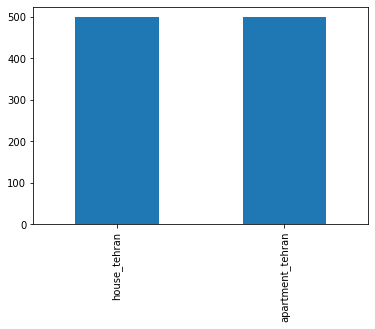

In [8]:
posts.label.value_counts().plot.bar()

## Price

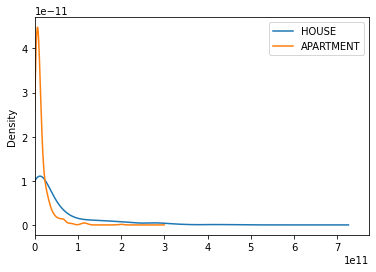

In [34]:
fig, ax = plt.subplots()

_ = posts[posts.label == 'house_tehran'].price.plot.kde()
_ = posts[posts.label == 'apartment_tehran'].price.plot.kde()

_ = ax.legend(["HOUSE", "APARTMENT"])
_ = ax.set_xlim(0)

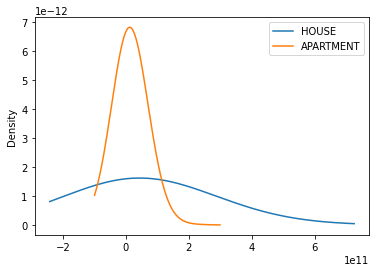

In [35]:
fig, ax = plt.subplots()

_ = posts[posts.label == 'house_tehran'].price.plot.kde(bw_method=3)
_ = posts[posts.label == 'apartment_tehran'].price.plot.kde(bw_method=3)

_ = ax.legend(["HOUSE", "APARTMENT"])

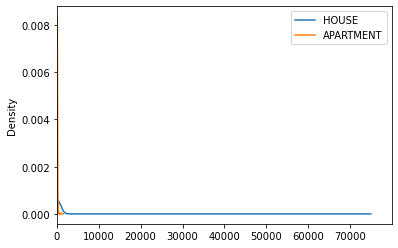

In [40]:
fig, ax = plt.subplots()

_ = posts[posts.label == 'house_tehran']['size'].plot.kde()
_ = posts[posts.label == 'apartment_tehran']['size'].plot.kde()

_ = ax.legend(["HOUSE", "APARTMENT"])
_ = ax.set_xlim(0)

## Size

In [44]:
posts_size = posts[posts['size'] < 2000]

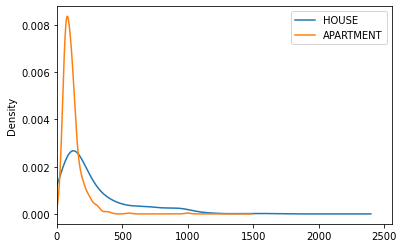

In [45]:
fig, ax = plt.subplots()

_ = posts_size[posts_size.label == 'house_tehran']['size'].plot.kde()
_ = posts_size[posts_size.label == 'apartment_tehran']['size'].plot.kde()

_ = ax.legend(["HOUSE", "APARTMENT"])
_ = ax.set_xlim(0)

## Model (Year)

In [48]:
posts.model.head()

0           ۱۳۷۱
1    قبل از ۱۳۷۰
2           ۱۳۷۱
3           ۱۳۸۳
4           ۱۳۸۰
Name: model, dtype: object

In [60]:
def make_model_int(model):
    try:
        return int(model)
    except:
        return 1369

In [64]:
posts.model = posts.model.apply(make_model_int)

In [68]:
posts['age'] = posts.model.apply(lambda x: 1402-x)

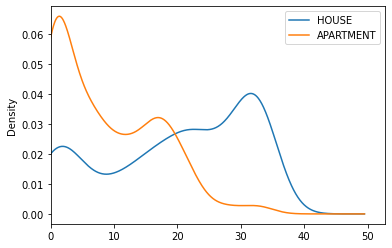

In [71]:
fig, ax = plt.subplots()

_ = posts[posts.label == 'house_tehran']['age'].plot.kde()
_ = posts[posts.label == 'apartment_tehran']['age'].plot.kde()

_ = ax.legend(["HOUSE", "APARTMENT"])
_ = ax.set_xlim(0)

In [74]:
posts_after_1370 = posts[posts.age < (1402-1369)]

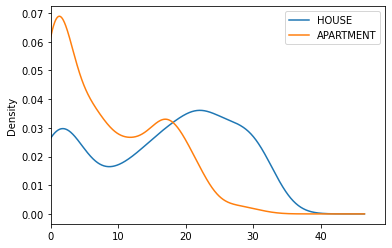

In [75]:
fig, ax = plt.subplots()

_ = posts_after_1370[posts_after_1370.label == 'house_tehran']['age'].plot.kde()
_ = posts_after_1370[posts_after_1370.label == 'apartment_tehran']['age'].plot.kde()

_ = ax.legend(["HOUSE", "APARTMENT"])
_ = ax.set_xlim(0)

## Price per Meter

In [83]:
posts['price_per_meter'] = posts['price'] / posts['size']

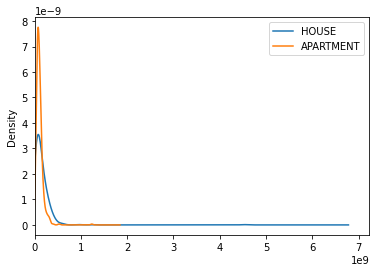

In [84]:
fig, ax = plt.subplots()

_ = posts[posts.label == 'house_tehran']['price_per_meter'].plot.kde()
_ = posts[posts.label == 'apartment_tehran']['price_per_meter'].plot.kde()

_ = ax.legend(["HOUSE", "APARTMENT"])
_ = ax.set_xlim(0)

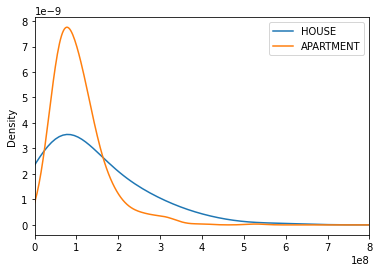

In [90]:
fig, ax = plt.subplots()

_ = posts[posts.label == 'house_tehran']['price_per_meter'].plot.kde()
_ = posts[posts.label == 'apartment_tehran']['price_per_meter'].plot.kde()

_ = ax.legend(["HOUSE", "APARTMENT"])
_ = ax.set_xlim(0,0.8e9)